1.
    The dataset that I have selected for this Capstone Report is from the "House Prices: Advanced Regression Techniques" competition on Kaggle, which uses the "Ames Housing dataset", compiled by Dean De Cock. According to the information that I have, this dataset was compiled for the specific purpose of use in data science education. This dataset describes the sale of idividual residential property in Ames, Iowa from 2006 to 2010. It contains 2930 observations and 23 nominal, 23 ordinal, 14 discrete, and 20 continuous explanatory variables. This dataset will obviously have the limitations in that it comes from a city that is (relatively) small, and so comparing the trends found here to somewhere like San Francisco or New York would be problematic. Regardless, this dataset is interesting because it contains so much information about the houses that sold, including things like type of porch and neighborhood, not just the sale price and square footage. 

Below we will setup our code so that we may examine some of the features of our dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train = pd.read_csv("C:/Users/Yarr/Thinkful/thinkful/train.csv")

We can see here the many variables we have access to by using the describe() function.

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can also get an idea of what kinds of values are in each of the columns by using the head() function to see the top 5 rows.

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can call len() to see how many houses are in our dataset.

In [11]:
len(train)

1460

We can now focus on some summary statistics for our sale price.

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

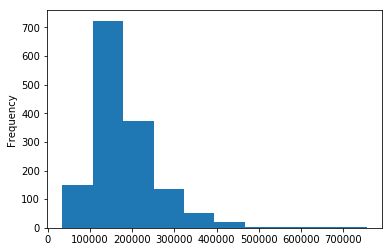

In [13]:
train.SalePrice.plot(kind='hist')

Here we can see that most of the houses are grouped around the 150000 to 200000 range, just as our mean and standard deviation values lead us to believe when we used describe on the saleprice above.

We can look at the interquartile range by using a boxplot, and seeing if there are outliers.

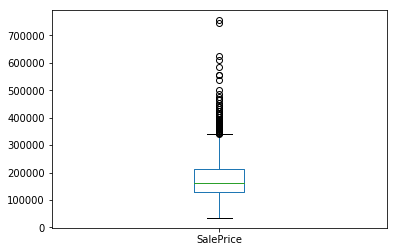

In [14]:
train.SalePrice.plot(kind='box')

We notice that quite a number of houses sold for well above what we would consider "normal" or within our expected standard deviations, so we can call them outliers.

Another thing we can look at is how many houses were sold in each year.

Text(0, 0.5, 'Year Sold Count')

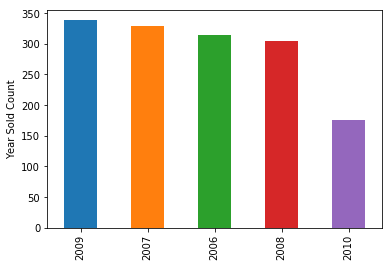

In [15]:
train.YrSold.value_counts().plot(kind='bar')
plt.ylabel('Year Sold Count')

We can see that the most houses were sold in 2009, and that far fewer were sold in 2010. We can create this nice bar chart because the data here is categorical.

In [16]:
train.YrSold.value_counts().describe()

count      5.000000
mean     292.000000
std       66.712068
min      175.000000
25%      304.000000
50%      314.000000
75%      329.000000
max      338.000000
Name: YrSold, dtype: float64

Another obvious variable to investigate is the square footage of the houses. In this dataset it is referred to as 'GrLivArea'.

In [17]:
train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x127cef30>,
 'caps': [<matplotlib.lines.Line2D at 0x127d61f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x127cec90>],
 'medians': [<matplotlib.lines.Line2D at 0x127d68f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x127d6930>],
 'means': []}

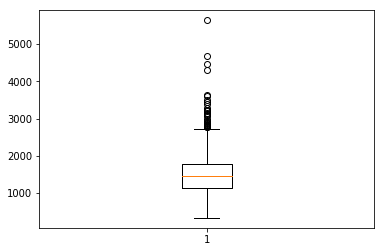

In [18]:
plt.boxplot(train['GrLivArea'])

After examining the living area data, I want to compare it to the sale price and see if a relationship pops out at me. I do this by plotting them both on a scatter plot.

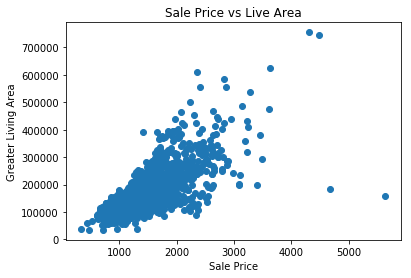

In [36]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.title("Sale Price vs Live Area")
plt.xlabel("Sale Price")
plt.ylabel("Greater Living Area")
plt.show()

Here we can see that there does seem to be some sort of a positive correlation between the two variables, but we can also see some obvious outliers. 

In [20]:
import seaborn as sns

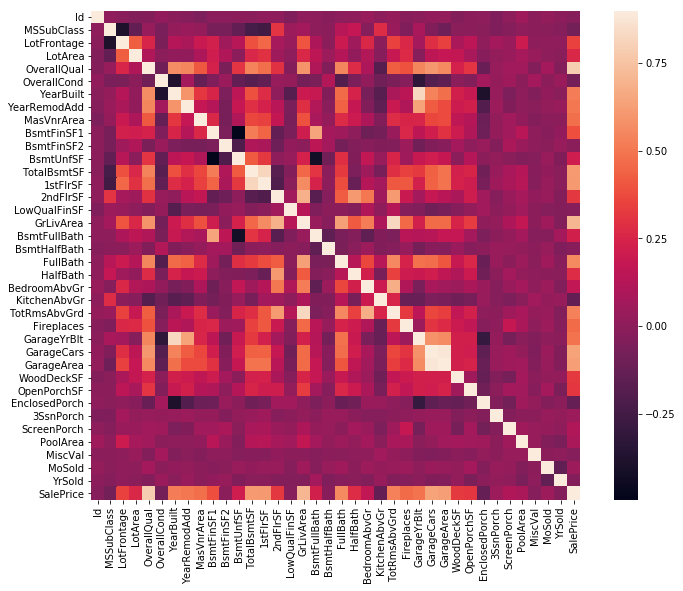

In [21]:
corrmat = train.corr()
plt.subplots(figsize=(12,9)) 
sns.heatmap(corrmat, vmax=0.9, square=True)

Here we use the seaborn package to look at the relationships between the variables

In [26]:
saleprice = np.array(train['SalePrice'])

In [29]:
salepricelog = np.log(saleprice)

In [30]:
salepricelog

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

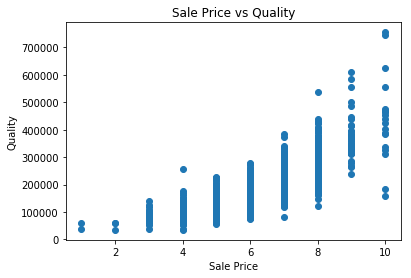

In [34]:
plt.scatter(train['OverallQual'], train['SalePrice'])
plt.title("Sale Price vs Quality")
plt.xlabel("Quality")
plt.ylabel("Saleprice")
plt.show()

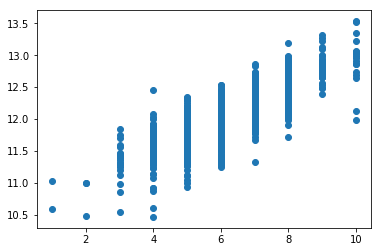

In [38]:
plt.scatter(train['OverallQual'], salepricelog)

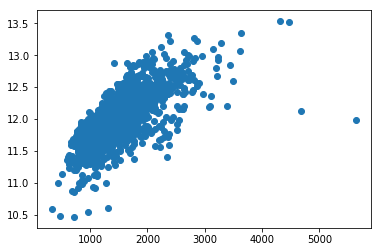

In [40]:
plt.scatter(train['GrLivArea'], salepricelog)

c:\users\yarr\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


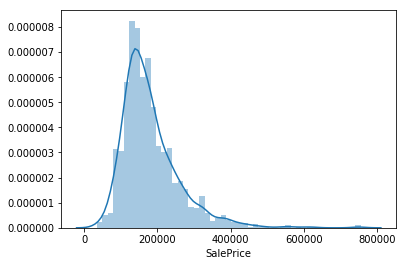

In [42]:
sns.distplot(train['SalePrice'])


We can see some skew when we plot the saleprice

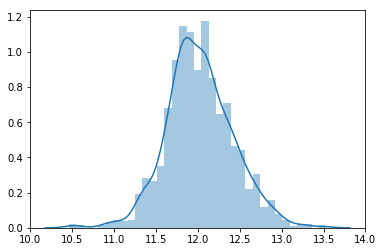

In [43]:
sns.distplot(salepricelog)